### **SPLEX PROJECT: Legendary predictions based on Pokémon stats**
*LEGOFFIC LIAM and ZHONG YANN*

This project is a data science exploration project in which we seek to use fundamental methods in data science analysis, most notably clustering and dimensionality reduction, in order to analyse and predict whethere "Pokémon", inhabitants of one of the world's greatest grossing franchises, are legendary or not. Moreover, we would also like to answer other questions that pertain to the correlation of a Pokémon's stats with itself - are its stats predictable enough to guess, based on one or two stats?

Currently, the fundamental questions we seek to answer are:
- Can we infer a Pokémon's legendary status from its base stat total? (likely, yes)
- Can we infer a Pokémon's legendary status from its individual stats (hard to say)
- Can we infer a Pokémon's legendary status from its competitive usage tiering? (OU, UU, etc. To be implemented if we have sufficient time)
- Can we infer a Pokémon's name from its base stat total and its belonging to either group? (Prediction)
- Do Pokémon's attack stats correlate with their defense stats?
- Do Pokémon's special attack stats correlate with their special defense stats?
- Do Pokémon's HP stats anti-correlate with their speed stats? ("Fat" Pokémon)

With more questions to come. 

Todo:
- Answer the questions above
- Incorporate OU and Ubers stats into csv
- Clustering methods: is there a method to the madness? Can "logical" groups form?
- Dimensionality reduction? => UMAP, t-SNE

In [3]:
# Imports
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from math import pi
# from wordcloud import WordCloud

matplotlib.rcParams['figure.dpi'] = 100    

In [4]:
# Read in input file
data = pd.read_csv('Pokemon.csv')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### STEP 1: Visualising the dataset

Before anything, we would like to visualise the rough spread of the Pokémon's base stat totals, as well as individual stats, over a density plot. 
This should enable us to have a global idea of what the general spread of stats, as well as outliers, is.
We would also like to look at the rough number of Pokémon per types in a histogram.

In [130]:
# Split legendaries and non-legendaries into two datasets
legendaries = data[data['Legendary']==True]
plebians = data[data['Legendary']==False]
raw_stats_no_total = data[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
raw_stats = data[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Legendary"]]

#legendaries
#plebians
#raw_stats

The average base stat total for legendaries and non legendaries is respectively 630.2666666666667 and 414.9131034482759
Below, a density distribution of base stat totals of all Pokémon over 6 generations:


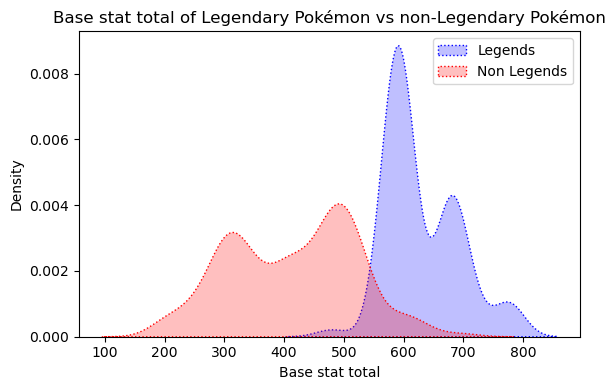

In [131]:
# Calculate average base stats
avg_l_base = sum(legendaries["Total"])/len(legendaries)
avg_p_base = sum(plebians["Total"])/len(plebians)

# Calculate average stats per generation for putting into a radar plot

print("The average base stat total for legendaries and non legendaries is respectively "+ str(avg_l_base) + " and " + str(avg_p_base))

# Append base stats into list
l_base_list = []
p_base_list = []

for base in legendaries["Total"]:
    l_base_list.append(base)
for base in plebians["Total"]:
    p_base_list.append(base)

print("Below, a density distribution of base stat totals of all Pokémon over 6 generations:")

# Density plot
fig, ax = plt.subplots()
sns.kdeplot(l_base_list,shade=True,color="blue",label="Legends",linestyle ="dotted")
sns.kdeplot(p_base_list,shade=True,color="red",label="Non Legends",linestyle ="dotted")
plt.title("Base stat total of Legendary Pokémon vs non-Legendary Pokémon")
plt.xlabel("Base stat total")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Below, the boxen plot distribution of base stats per generation:


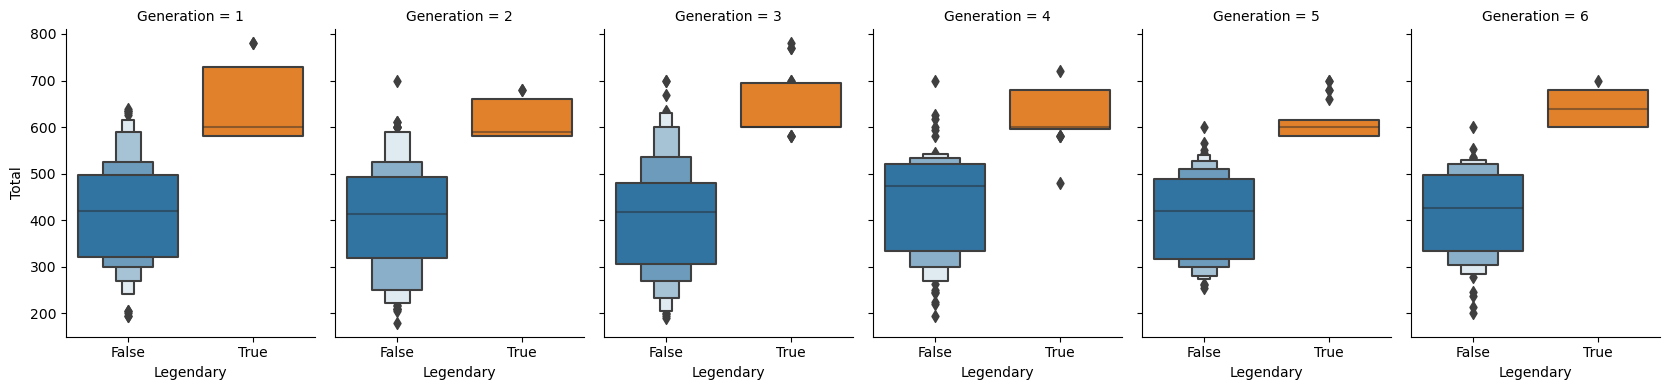

In [132]:
# Visualise boxplots of base stat totals per generation
print("Below, the boxen plot distribution of base stats per generation:")
base_total_plot = sns.catplot(x = "Legendary", y = "Total", col = "Generation", data = data, kind = "boxen", height=4, aspect=.7)

Below, the point plot distribution of base stats per generation with type 1 grouped by color:


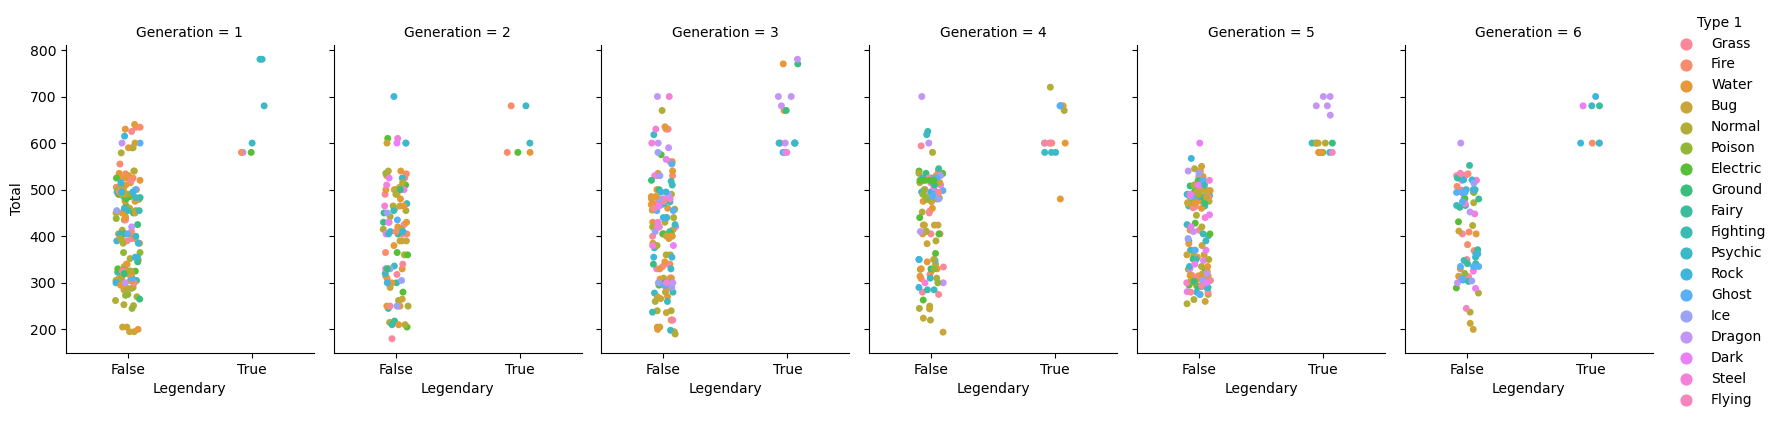

In [133]:
# Similar plot, with confounded type 1 visualisation on a point plot
print("Below, the point plot distribution of base stats per generation with type 1 grouped by color:")
base_total_plot_2 = sns.catplot(x = "Legendary", y = "Total", col = "Generation", hue = "Type 1", data = data, height=4, aspect=.7)

Below, the box plot distribution of stats with outliers, for all Pokémon regardless of generation:


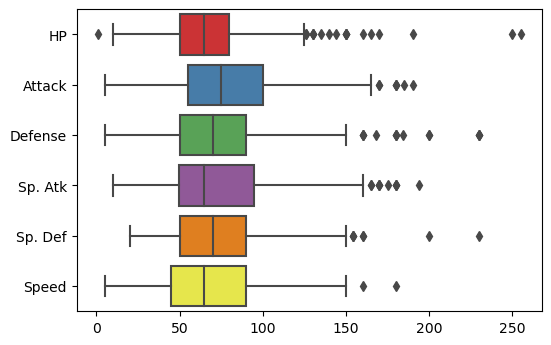

In [134]:
print("Below, the box plot distribution of stats with outliers, for all Pokémon regardless of generation:")
stats_plot = sns.boxplot(data=raw_stats_no_total, orient="h", palette="Set1", showfliers=True)
#stats_plot_no_out = sns.boxplot(data=raw_stats_no_total, orient="h", palette="Set1", showfliers=False) # Remove outliers

In [128]:
# What are the average stats over every generation?
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats_list = round(data[stats].mean(),2)
print("Average stats over every generation:")
print("HP:" + str(stats_list[0]) + "; Atk:"+ str(stats_list[1]) + "; Def:"+ str(stats_list[2])+ "; SpAtk:"+ str(stats_list[3])+ "; SpDef:"+ str(stats_list[4])+ "; Speed:"+ str(stats_list[5]))

# Split data by generation and get mean of stats
g1 = data[data["Generation"] == 1]
g2 = data[data["Generation"] == 2]
g3 = data[data["Generation"] == 3]
g4 = data[data["Generation"] == 4]
g5 = data[data["Generation"] == 5]
g6 = data[data["Generation"] == 6]
# Get average stats
stats_list_g1 = list(round(g1[stats].mean(),2))
stats_list_g2 = list(round(g2[stats].mean(),2))
stats_list_g3 = list(round(g3[stats].mean(),2))
stats_list_g4 = list(round(g4[stats].mean(),2))
stats_list_g5 = list(round(g5[stats].mean(),2))
stats_list_g6 = list(round(g6[stats].mean(),2))
# Concatenate
stats_list_complete = list(zip(stats_list_g1,stats_list_g2,stats_list_g3,stats_list_g4,stats_list_g5,stats_list_g6))

print("Average stats per generation:")
for line in stats_list_complete:
    print("HP:" + str(line[0]) + "; Atk:"+ str(line[1]) + "; Def:"+ str(line[2])+ "; SpAtk:"+ str(line[3])+ "; SpDef:"+ str(line[4])+ "; Speed:"+ str(line[5]))


Average stats over every generation:
HP:69.26; Atk:79.0; Def:73.84; SpAtk:72.82; SpDef:71.9; Speed:68.28
Average stats per generation:
HP:65.82; Atk:71.21; Def:66.54; SpAtk:73.08; SpDef:71.79; Speed:68.27
HP:76.64; Atk:72.03; Def:81.62; SpAtk:82.87; SpDef:82.07; Speed:75.8
HP:70.86; Atk:73.39; Def:74.1; SpAtk:78.13; SpDef:72.33; Speed:76.68
HP:71.82; Atk:65.94; Def:75.81; SpAtk:76.4; SpDef:71.99; Speed:74.29
HP:69.09; Atk:73.91; Def:71.22; SpAtk:77.19; SpDef:68.74; Speed:74.89
HP:72.58; Atk:61.81; Def:66.92; SpAtk:71.34; SpDef:68.08; Speed:66.44


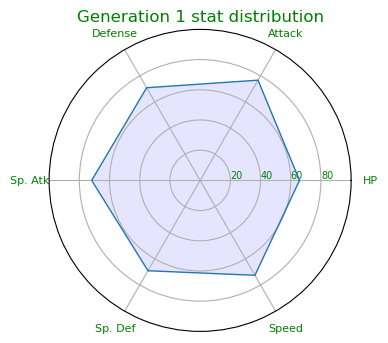

In [102]:
# Radar plot for 1 generation - we can expect this to be similar for every generation.
# So, using averaged stats for prediction might prove complicated.
stats_list_g1 += stats_list_g1[:1]
angles = [n / 6 * 2 * pi for n in range(6)] # 6 stats
angles += angles[:1] # Add in first one again to close the circle ("7th")

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw axes
plt.xticks(angles[:-1], stats, color='Green', size=8)
ax.set_rlabel_position(0)
plt.yticks([20,40,60,80],["20","40","60","80"], color="green", size=7)
plt.ylim(0,100)

# Plot data and fill area
ax.plot(angles, stats_list_g1, linewidth=1, linestyle='solid')
ax.fill(angles, stats_list_g1, 'b', alpha=0.1)
plt.title("Generation 1 stat distribution", color="Green")
plt.show()

### STEP 2: Clustering

The second step was to apply both supervised and unsupervised learning in order to see what kind of inference our methods could make from grouping all these Pokémon.